### task 4: Complete all tasks listed in the weather_processing.py file
#### I've decided to do the task in Jupyter enviroment, as it looks like an optimal approach

In [217]:
# TODO Import the necessary libraries
import pandas as pd
import fileinput
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [218]:
# TODO Import the dataset

# reading from the file
# removing 3 spaces and 4 spaces
path = r'weather_dataset.data'
with fileinput.FileInput(path, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace('  ', ' ').replace('   ', ' '), end='')
        

In [219]:
# TODO  Assign it to a variable called data and replace the first 3 columns by a proper datetime index

# reading as csv, skipping 1st 2 rows, adding columns manually
data = pd.read_csv(path, skiprows = 2, sep = ' '  ,names = ["Yr", "Mo", "Dy", "loc1", "loc2", "loc3" ,
                                  "loc4", "loc5", "loc6", "loc7", "loc8", "loc9", "loc10", "loc11", "loc12"] )


In [220]:
#simply coverting 3 columns by applying convert_data function
# TODO Write a function in order to fix date (this relate only to the year info) and apply it
def convert_data(series):
    series['date'] = pd.to_datetime('19' + str(series['Yr']) + '/' + str(series['Mo']) + '/' + str(series['Dy']))
    return series
    
data = data.apply(convert_data, axis = 1)
data.head()

,Yr,Mo,Dy,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12,date
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [221]:
#removing useless columns, setting a datetime index
del data['Yr']
del data['Mo']
del data['Dy']
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]
data.head()

,date,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [222]:
# TODO Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]
data = data.set_index('date')
data.head()

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [223]:
#simple check
data.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='date', length=6574, freq=None)

In [224]:
# TODO Check if everything is okay with the data. Create functions to delete/fix rows with strange cases and apply them
data.isna().sum()

loc1     6
loc2     3
loc3     3
loc4     5
loc5     2
loc6     0
loc7     3
loc8     2
loc9     4
loc10    1
loc11    0
loc12    4
dtype: int64

In [225]:
data = data.apply(pd.to_numeric, errors='coerce', axis=1)

In [226]:
data.describe()

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
count,6567.000000,6569.000000,6.570000e+03,6567.000000,6569.000000,6573.000000,6570.000000,6570.000000,6.569000e+03,6572.000000,6573.000000,6569.000000
mean,12.362814,10.644645,1.165808e+01,6.304810,10.457089,7.092090,9.794537,8.493878,1.522302e+12,8.707115,13.119168,15.598111
std,5.618823,5.267991,5.010262e+00,3.606568,4.936183,3.968963,4.979986,4.498154,1.233816e+14,4.504263,5.833575,6.699844
min,0.670000,0.210000,1.000000e-17,0.000000,0.130000,0.000000,0.000000,0.000000,-1.534000e+01,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000e+00,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000e+00,5.330000,8.710000,10.710000
50%,11.710000,10.170000,1.092000e+01,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000e+00,8.290000,12.500000,15.000000
75%,15.920000,14.040000,1.467000e+01,8.420000,13.540000,9.670000,12.960000,11.420000,1.121000e+01,11.630000,16.880000,19.830000
max,35.800000,33.370000,3.384000e+01,28.460000,37.540000,26.160000,30.370000,31.080000,1.000000e+16,28.210000,42.380000,42.540000


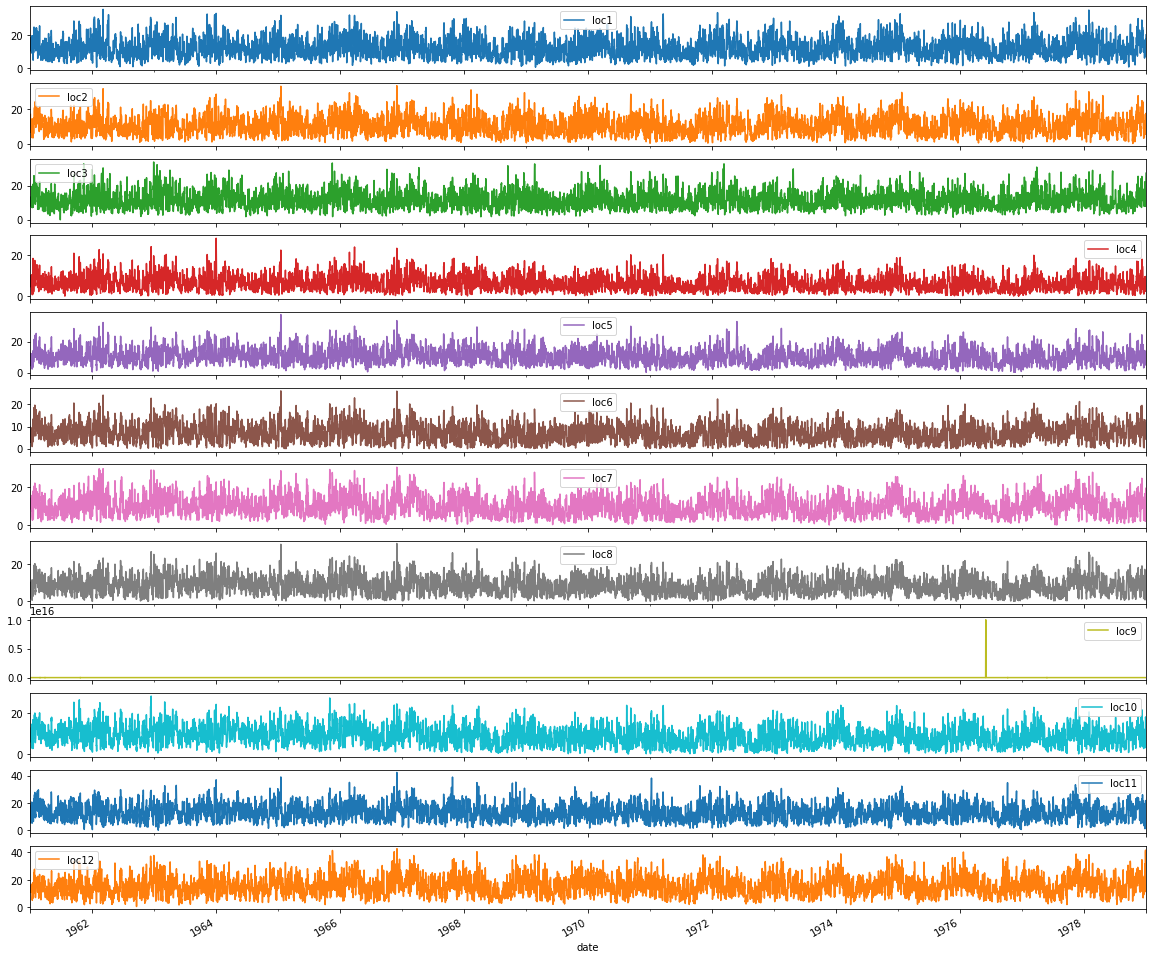

In [227]:
data.plot(subplots=True, layout=(13,1), figsize = (20,20))

plt.show()

### doesn't look as there are a lot of missing values, the other problems with data (i.e. having 4 spaces where should be 1 or reformatting the yr/mo/dy columns were resolved above), but, as we can see on plot there is strange situation in loc9 column. below i fix the column:

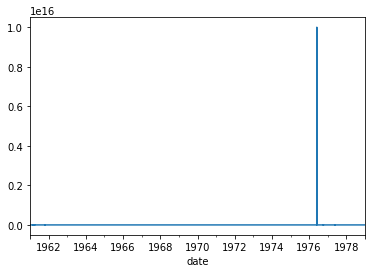

In [228]:
data['loc9'].plot()

In [229]:
data['loc9'].sort_values(ascending = False)

date
1976-05-31    1.000000e+16
1965-01-17    2.588000e+01
1962-12-15    2.580000e+01
1966-12-01    2.562000e+01
1962-02-12    2.529000e+01
                  ...     
1961-03-01             NaN
1961-03-30             NaN
1961-10-24             NaN
1976-10-07             NaN
1977-05-26             NaN
Name: loc9, Length: 6574, dtype: float64

In [230]:
data['1976-05-28': '1976-06-02']

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
date,,,,,,,,,,,,
1976-05-28,9.13,8.67,5.13,2.62,9.33,3.50,4.63,5.00,8.040000e+00,6.04,10.21,11.04
1976-05-29,11.83,10.00,10.25,2.79,7.00,3.83,3.33,6.42,6.290000e+00,4.58,12.29,6.00
1976-05-30,15.92,13.42,14.09,6.63,13.00,6.54,8.29,10.13,1.179000e+01,7.54,17.54,12.71
1976-05-31,9.96,11.42,10.41,3.29,9.75,5.09,6.29,6.75,1.000000e+16,5.88,11.50,9.42
1976-06-01,13.04,8.83,10.79,7.21,10.83,6.96,12.92,8.25,9.960000e+00,10.92,11.34,14.75
1976-06-02,5.37,3.25,6.54,2.04,2.13,0.04,4.29,1.50,3.830000e+00,2.50,6.34,6.79


In [231]:
# average value take from the day before and day after
data.at['1976-05-31', 'loc9'] = (data.at['1976-05-30', 'loc9'] + data.at['1976-06-01', 'loc9'])/2

In [232]:
data['loc9'].sort_values(ascending = False)

date
1965-01-17    25.88
1962-12-15    25.80
1966-12-01    25.62
1962-02-12    25.29
1974-12-23    25.00
              ...  
1961-03-01      NaN
1961-03-30      NaN
1961-10-24      NaN
1976-10-07      NaN
1977-05-26      NaN
Name: loc9, Length: 6574, dtype: float64

### there is also one negative value in loc9 column (look min row), below i remove the value

In [233]:
data.describe()

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
count,6567.000000,6569.000000,6.570000e+03,6567.000000,6569.000000,6573.000000,6570.000000,6570.000000,6569.000000,6572.000000,6573.000000,6569.000000
mean,12.362814,10.644645,1.165808e+01,6.304810,10.457089,7.092090,9.794537,8.493878,8.488999,8.707115,13.119168,15.598111
std,5.618823,5.267991,5.010262e+00,3.606568,4.936183,3.968963,4.979986,4.498154,4.177004,4.504263,5.833575,6.699844
min,0.670000,0.210000,1.000000e-17,0.000000,0.130000,0.000000,0.000000,0.000000,-15.340000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000e+00,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,1.092000e+01,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,1.467000e+01,8.420000,13.540000,9.670000,12.960000,11.420000,11.170000,11.630000,16.880000,19.830000
max,35.800000,33.370000,3.384000e+01,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [234]:
data['loc9'].sort_values(ascending = True)

date
1976-05-24   -15.34
1977-11-29     0.00
1976-11-19     0.17
1977-11-30     0.21
1967-11-23     0.29
              ...  
1961-03-01      NaN
1961-03-30      NaN
1961-10-24      NaN
1976-10-07      NaN
1977-05-26      NaN
Name: loc9, Length: 6574, dtype: float64

In [235]:
data['1976-05-20':'1976-05-28']

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
date,,,,,,,,,,,,
1976-05-20,14.17,8.63,8.25,6.79,10.71,6.25,8.38,6.17,8.42,7.04,12.54,9.08
1976-05-21,15.37,15.16,12.17,5.88,10.37,7.62,9.83,9.13,11.21,11.21,18.41,17.46
1976-05-22,13.62,14.21,13.00,7.58,10.17,8.96,10.54,9.08,13.21,9.25,18.71,16.58
1976-05-23,14.17,16.38,11.79,8.50,14.04,10.50,9.50,11.83,15.54,11.00,19.00,20.88
1976-05-24,15.50,15.21,12.83,7.71,15.46,9.42,11.08,11.63,-15.34,12.12,21.54,25.04
1976-05-25,13.46,10.71,7.87,6.34,11.54,7.41,10.00,9.21,10.46,9.83,17.12,16.54
1976-05-26,7.38,7.08,5.88,1.92,2.17,0.83,7.12,2.37,5.00,3.88,9.67,10.00
1976-05-27,6.79,11.54,8.00,2.50,5.83,2.42,3.29,2.58,4.75,2.67,13.33,5.29
1976-05-28,9.13,8.67,5.13,2.62,9.33,3.50,4.63,5.00,8.04,6.04,10.21,11.04


### looks like the sign is flipped for that one, i will unflip it

In [236]:
data.at['1976-05-24', 'loc9'] = np.abs(data.at['1976-05-24', 'loc9'])

In [237]:
#check
data['loc9'].sort_values(ascending = True)

date
1977-11-29    0.00
1976-11-19    0.17
1977-11-30    0.21
1975-10-08    0.29
1967-11-23    0.29
              ... 
1961-03-01     NaN
1961-03-30     NaN
1961-10-24     NaN
1976-10-07     NaN
1977-05-26     NaN
Name: loc9, Length: 6574, dtype: float64

### checking loc12 as it features the max values

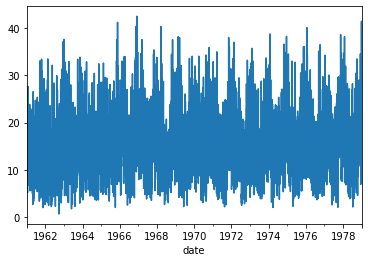

In [238]:
data['loc12'].plot()

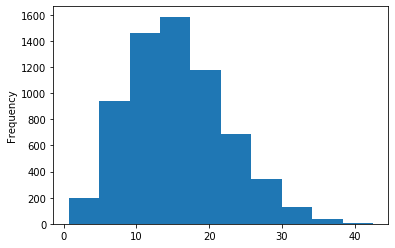

In [239]:
data['loc12'].plot.hist()

In [240]:
# TODO Compute how many values are missing for each location over the entire record
data.isnull().sum()

loc1     7
loc2     5
loc3     4
loc4     7
loc5     5
loc6     1
loc7     4
loc8     4
loc9     5
loc10    2
loc11    1
loc12    5
dtype: int64

In [241]:
# TODO Compute how many non-missing values there are in total
data.notnull().sum().sum()

78838

In [242]:
#overall size
data.size

78888

In [243]:
# TODO Calculate the mean windspeeds of the windspeeds over all the locations and all the times
data.mean(axis = 0)

loc1     12.362814
loc2     10.644645
loc3     11.658078
loc4      6.304810
loc5     10.457089
loc6      7.092090
loc7      9.794537
loc8      8.493878
loc9      8.493670
loc10     8.707115
loc11    13.119168
loc12    15.598111
dtype: float64

In [244]:
# TODO Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds 
# and standard deviations of the windspeeds at each location over all the days

loc_stats = data.describe()
loc_stats

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
count,6567.000000,6569.000000,6.570000e+03,6567.000000,6569.000000,6573.000000,6570.000000,6570.000000,6569.000000,6572.000000,6573.000000,6569.000000
mean,12.362814,10.644645,1.165808e+01,6.304810,10.457089,7.092090,9.794537,8.493878,8.493670,8.707115,13.119168,15.598111
std,5.618823,5.267991,5.010262e+00,3.606568,4.936183,3.968963,4.979986,4.498154,4.167497,4.504263,5.833575,6.699844
min,0.670000,0.210000,1.000000e-17,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000e+00,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,1.092000e+01,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,1.467000e+01,8.420000,13.540000,9.670000,12.960000,11.420000,11.210000,11.630000,16.880000,19.830000
max,35.800000,33.370000,3.384000e+01,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [245]:
loc_stats = loc_stats.loc[['mean', 'min', 'max', 'std']]
loc_stats

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
mean,12.362814,10.644645,1.165808e+01,6.304810,10.457089,7.092090,9.794537,8.493878,8.493670,8.707115,13.119168,15.598111
min,0.670000,0.210000,1.000000e-17,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,3.384000e+01,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
std,5.618823,5.267991,5.010262e+00,3.606568,4.936183,3.968963,4.979986,4.498154,4.167497,4.504263,5.833575,6.699844


In [246]:
# TODO Find the average windspeed in January for each location
def check_month(index, month_num=1):
    return True if index.month == month_num else False


        
data_new = data.groupby(by=check_month)

data_new = data_new.mean().loc[True]
data_new

loc1     14.847325
loc2     12.914560
loc3     13.299624
loc4      7.199498
loc5     11.667734
loc6      8.054839
loc7     11.819355
loc8      9.512047
loc9      9.543208
loc10    10.053566
loc11    14.550520
loc12    18.028763
Name: True, dtype: float64

In [247]:
# TODO Downsample the record to a yearly frequency for each location
data_year = data.resample('AS')
data_year.mean()

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
date,,,,,,,,,,,,
1961-01-01,12.299583,10.351796,11.314696,6.923722,10.882597,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-01-01,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-01-01,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-01-01,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-01-01,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-01-01,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-01-01,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-01-01,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-01-01,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [248]:
# TODO Downsample the record to a monthly frequency for each location
data_month = data.resample('MS')
data_month.mean()

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
date,,,,,,,,,,,,
1961-01-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-01,16.269286,14.975357,14.250385,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-01,10.890000,11.296452,10.752903,7.284000,10.507000,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-01,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-01,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-01,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-01,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [249]:
# TODO Downsample the record to a weekly frequency for each location
data_month = data.resample('W')
data_month.mean()

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [250]:
# TODO Calculate the min, max and mean windspeeds and standard deviations of the 
# windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 21 weeks
data_month = data.loc['1961-01-02':].resample('7D').mean()
data_month = data_month.head(21)

data_month = pd.concat([data_month.min(axis = 1), data_month.max(axis = 1), 
                        data_month.mean(axis = 1), data_month.std(axis = 1)], axis = 1)
data_month.columns = ['min', 'max', 'mean', 'std']
data_month

,min,max,mean,std
date,,,,
1961-01-02,6.417143,13.541429,9.847659,2.601705
1961-01-09,4.630000,12.468571,8.353214,2.719649
1961-01-16,6.328571,13.204286,9.368413,2.224531
1961-01-23,12.720000,22.530000,16.958095,2.915635
1961-01-30,8.247143,16.827143,11.800357,2.807310
1961-02-06,10.774286,21.832857,15.891548,3.147412
1961-02-13,9.542857,21.167143,13.648869,3.115619
1961-02-20,8.524286,16.304286,12.604286,2.364323
1961-02-27,7.834286,17.842857,11.766766,2.535336
